# Full Data Science Cycle for This Project

## Problem Definition
The business wants to reduce customer loss.
You need to predict which customers are likely to churn so the company can take action.
You define:
The target variable: Churn (0 = stay, 1 = leave)
The success metric: F1-score or Recall (identify churners correctly)
## 1. Data Cleaning
Perform:
Handle missing values
Remove duplicates
Fix incorrect data types
Encode categorical features
Treat outliers
You will learn:
.isnull(), .fillna(), .dropna()
Label Encoding / One-Hot Encoding
Dealing with imbalanced classes
## 2. Exploratory Data Analysis (EDA)
Visualize:
Churn rate
Distribution of fees, tenure, contract type
Correlations between features
Boxplots, histograms, violin plots, heatmaps
Find insights like:
Customers with month-to-month plans churn more
Customers with high monthly charges are at risk
## 3. Feature Engineering
Create new variables that help prediction, such as:
Tenure groups (0–3 months, 3–12 months, etc.)
Total spend = monthly_charges * tenure
Has multiple services? (binary)
Remove useless features like:
CustomerID
## 4. Modeling
Train several ML models:
Logistic Regression
Random Forest
Gradient Boosting (XGBoost or LightGBM)
SVM
KNN
Split data:
train_test_split(X, y, test_size=0.2)
## 5. Evaluation
Measure performance using:
Accuracy
Precision
Recall
F1-score
ROC-AUC
Confusion matrix
Focus on Recall → better at catching churners.
## 6. Model Improvement
Try GridSearchCV or RandomizedSearchCV
Tune hyperparameters
Add or remove features
Try class balancing (SMOTE, class weights)
## 7. Visualize & Storytell
Create visuals to explain:
Why customers churn
What factors matter most (feature importance)
How churn rate changes across groups
Use:
Matplotlib
Seaborn
Plotly
SHAP (advanced interpretability)

--------

# Lets get started
--------

## 1 Data Cleaning

1. Remove duplicates
1. Handle missing values 
1. Fix incorrect data types
1. Encode categorical features
1. Treat outliers

In [92]:
# Get data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('../data/Telco_Customer_Churn.csv')
data.head()

,CustomerID,Surname,NetworkScore,Region,Gender,Age,Tenure,MonthlyCharge,NumOfProducts,HasInternetService,IsActiveMember,EstimatedMonthlyUsage,Exited
0,4971,Moreno,25.0,South,Female,26.0,11,134.20,1,0,1.0,NaN,1
1,2858,Bell,68.0,North,Female,60.0,17,25.72,3,1,1.0,533.40,0
2,5794,Baker,34.0,North,Male,28.0,7,131.03,2,0,0.0,509.04,0
3,3996,Jackson,13.0,South,Male,65.0,2,64.27,3,0,1.0,246.48,0
4,2680,Craig,50.0,East,Female,60.0,16,41.26,3,1,1.0,902.28,1


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             4020 non-null   int64  
 1   Surname                4020 non-null   object 
 2   NetworkScore           3821 non-null   float64
 3   Region                 4020 non-null   object 
 4   Gender                 4020 non-null   object 
 5   Age                    3812 non-null   float64
 6   Tenure                 4020 non-null   int64  
 7   MonthlyCharge          4020 non-null   float64
 8   NumOfProducts          4020 non-null   int64  
 9   HasInternetService     4020 non-null   int64  
 10  IsActiveMember         3822 non-null   float64
 11  EstimatedMonthlyUsage  3823 non-null   float64
 12  Exited                 4020 non-null   int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 408.4+ KB


In [94]:
for col in data.select_dtypes(include=['object']).columns:
    print(f"{col}: {data[col].nunique()} unique values")

Surname: 875 unique values
Region: 4 unique values
Gender: 3 unique values


In [95]:
data.set_index("CustomerID", inplace=True)
data.head()

,Surname,NetworkScore,Region,Gender,Age,Tenure,MonthlyCharge,NumOfProducts,HasInternetService,IsActiveMember,EstimatedMonthlyUsage,Exited
CustomerID,,,,,,,,,,,,
4971,Moreno,25.0,South,Female,26.0,11,134.20,1,0,1.0,NaN,1
2858,Bell,68.0,North,Female,60.0,17,25.72,3,1,1.0,533.40,0
5794,Baker,34.0,North,Male,28.0,7,131.03,2,0,0.0,509.04,0
3996,Jackson,13.0,South,Male,65.0,2,64.27,3,0,1.0,246.48,0
2680,Craig,50.0,East,Female,60.0,16,41.26,3,1,1.0,902.28,1


In [96]:
# get duplicates

duplicate_rows = data[data.duplicated(keep=False)]
duplicate_rows


,Surname,NetworkScore,Region,Gender,Age,Tenure,MonthlyCharge,NumOfProducts,HasInternetService,IsActiveMember,EstimatedMonthlyUsage,Exited
CustomerID,,,,,,,,,,,,


In [97]:
# remove duplicates

data = data.drop_duplicates(keep="last")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4020 entries, 4971 to 3579
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Surname                4020 non-null   object 
 1   NetworkScore           3821 non-null   float64
 2   Region                 4020 non-null   object 
 3   Gender                 4020 non-null   object 
 4   Age                    3812 non-null   float64
 5   Tenure                 4020 non-null   int64  
 6   MonthlyCharge          4020 non-null   float64
 7   NumOfProducts          4020 non-null   int64  
 8   HasInternetService     4020 non-null   int64  
 9   IsActiveMember         3822 non-null   float64
 10  EstimatedMonthlyUsage  3823 non-null   float64
 11  Exited                 4020 non-null   int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 408.3+ KB


In [98]:
# find columns with missing values

data.isna().sum()



Surname                    0
NetworkScore             199
Region                     0
Gender                     0
Age                      208
Tenure                     0
MonthlyCharge              0
NumOfProducts              0
HasInternetService         0
IsActiveMember           198
EstimatedMonthlyUsage    197
Exited                     0
dtype: int64

In [99]:
# Find rows with missing values
missing_rows = data[data.isna().any(axis=1)]
missing_rows

,Surname,NetworkScore,Region,Gender,Age,Tenure,MonthlyCharge,NumOfProducts,HasInternetService,IsActiveMember,EstimatedMonthlyUsage,Exited
CustomerID,,,,,,,,,,,,
4971,Moreno,25.0,South,Female,26.0,11,134.20,1,0,1.0,NaN,1
4064,Martin,82.0,West,Other,20.0,17,199.60,3,0,1.0,NaN,1
1741,Nguyen,84.0,West,Other,26.0,14,112.59,4,1,1.0,NaN,1
1993,Green,NaN,East,Male,50.0,2,74.54,4,1,1.0,665.12,0
1737,Wright,97.0,West,Female,36.0,16,39.09,1,0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5304,Christensen,6.0,East,Other,NaN,9,55.88,3,0,1.0,374.24,0
5175,Morgan,83.0,North,Male,NaN,2,41.20,1,0,1.0,322.38,1
4464,Brown,NaN,West,Male,68.0,13,103.86,3,0,1.0,833.35,0


In [100]:
# outliers

# select only numerical columns
num_cols = data.select_dtypes(include=['int64', 'float64'])

# calculate IQR for each numerical column
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1

# boolean mask of outliers
outlier_mask = (num_cols < (Q1 - 1.5 * IQR)) | (num_cols > (Q3 + 1.5 * IQR))

# get rows containing any outlier
outlier_rows = data[outlier_mask.any(axis=1)]

outlier_rows


,Surname,NetworkScore,Region,Gender,Age,Tenure,MonthlyCharge,NumOfProducts,HasInternetService,IsActiveMember,EstimatedMonthlyUsage,Exited
CustomerID,,,,,,,,,,,,


There are outliers but in this case the numerical columns are related to each other and the values seem reasionable so I dont think i should remove the outliers.

---------
## Data Validation

gonna assume that the data is within valid range.

-------
## Data Visulisation


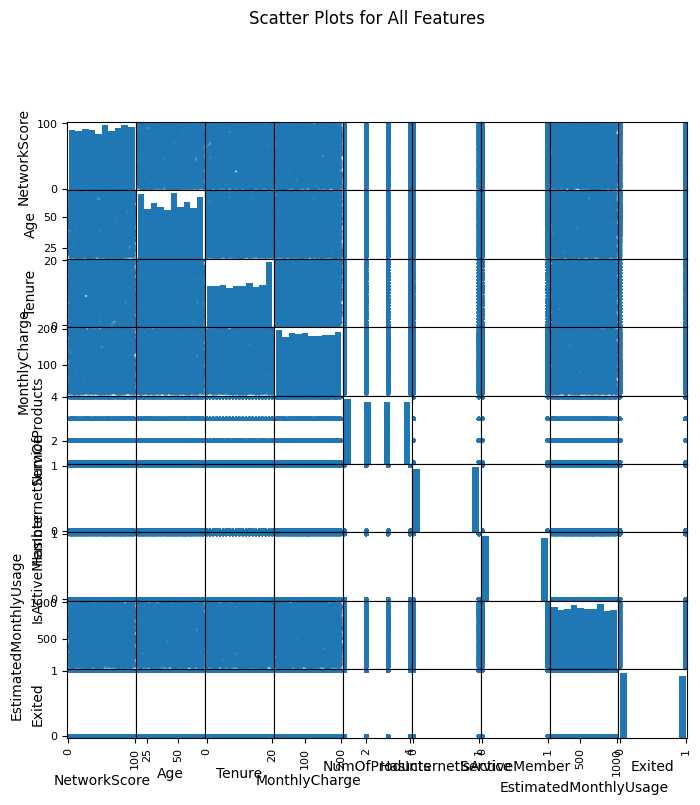

In [101]:
pd.plotting.scatter_matrix(data, figsize=(8, 8), diagonal='hist')

plt.suptitle("Scatter Plots for All Features", y=1.02)
plt.show()

In [102]:
## Seeing if there is a class imbalance in the target variable
churn_counts = data['Exited'].value_counts()
print(churn_counts)

Exited
0    2068
1    1952
Name: count, dtype: int64


------
## Feature Engineering

In [103]:
# converting tenure into groups (0-3months, 3-6 ....)
data

,Surname,NetworkScore,Region,Gender,Age,Tenure,MonthlyCharge,NumOfProducts,HasInternetService,IsActiveMember,EstimatedMonthlyUsage,Exited
CustomerID,,,,,,,,,,,,
4971,Moreno,25.0,South,Female,26.0,11,134.20,1,0,1.0,NaN,1
2858,Bell,68.0,North,Female,60.0,17,25.72,3,1,1.0,533.40,0
5794,Baker,34.0,North,Male,28.0,7,131.03,2,0,0.0,509.04,0
3996,Jackson,13.0,South,Male,65.0,2,64.27,3,0,1.0,246.48,0
2680,Craig,50.0,East,Female,60.0,16,41.26,3,1,1.0,902.28,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Deleon,63.0,North,Other,68.0,18,141.91,4,0,1.0,284.05,0
5669,Yang,61.0,North,Other,55.0,1,197.76,3,1,0.0,860.55,0
2689,Mckenzie,37.0,South,Female,35.0,17,173.76,2,0,0.0,679.21,0


-------

## Modeling

- I am going to be using an XGBoost model
- but before I start modeling, I will create a train/test split and address class imbalance

In [109]:
# ============================================================
# End-to-end ML pipeline with continuous hyperparam evaluation
# Stores best model across runs + logs run history
# ============================================================

import os
import json
import time
import uuid
from datetime import datetime
from imblearn.over_sampling import SMOTENC

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    f1_score,
    accuracy_score,
    classification_report,
    confusion_matrix,
)

import joblib

# If you use XGBoost:
from xgboost import XGBClassifier


# ----------------------------
# Config (EDIT THESE)
# ----------------------------
TARGET_COL = "Exited"           # <-- change if different
POS_LABEL = "Yes"              # if your target is "Yes"/"No". Otherwise set to 1 or True etc.
NEG_LABEL = "No"

TEST_SIZE = 0.2
RANDOM_STATE = 42

# Choose which metric decides "best"
# Options: "roc_auc", "pr_auc", "f1", "accuracy"
PRIMARY_METRIC = "roc_auc"

N_ITER = 40          # how many random hyperparam samples to try
CV_SPLITS = 5        # cross-validation folds
N_JOBS = -1
VERBOSE = 2

ARTIFACT_DIR = "artifacts"
BEST_DIR = os.path.join(ARTIFACT_DIR, "best")
RUNS_DIR = os.path.join(ARTIFACT_DIR, "runs")

BEST_MODEL_PATH = os.path.join(BEST_DIR, "best_model.joblib")
BEST_META_PATH = os.path.join(BEST_DIR, "best_meta.json")
RUNS_LOG_PATH = os.path.join(ARTIFACT_DIR, "runs.csv")


# ----------------------------
# Utilities
# ----------------------------
def ensure_dirs():
    os.makedirs(ARTIFACT_DIR, exist_ok=True)
    os.makedirs(BEST_DIR, exist_ok=True)
    os.makedirs(RUNS_DIR, exist_ok=True)


def now_iso():
    return datetime.utcnow().replace(microsecond=0).isoformat() + "Z"


def safe_metric_get(metrics: dict, key: str) -> float:
    val = metrics.get(key, None)
    if val is None or (isinstance(val, float) and np.isnan(val)):
        return float("-inf")
    return float(val)


def load_best_meta() -> dict:
    if os.path.exists(BEST_META_PATH):
        with open(BEST_META_PATH, "r", encoding="utf-8") as f:
            return json.load(f)
    return {}


def save_json(path: str, obj: dict):
    with open(path, "w", encoding="utf-8") as f:
        json.dump(obj, f, indent=2, sort_keys=True)


def append_run_log(row: dict):
    df_row = pd.DataFrame([row])
    if os.path.exists(RUNS_LOG_PATH):
        df_row.to_csv(RUNS_LOG_PATH, mode="a", header=False, index=False)
    else:
        df_row.to_csv(RUNS_LOG_PATH, mode="w", header=True, index=False)


# ----------------------------
# Data loading + basic cleanup
# ----------------------------
def load_data(path: str) -> pd.DataFrame:
    df = pd.read_csv(path)
    # Optional: drop obvious ID columns if you have them
    # for col in ["customerID", "id", "ID"]:
    #     if col in df.columns:
    #         df = df.drop(columns=[col])
    return df


def split_X_y(df: pd.DataFrame, target_col: str):
    if target_col not in df.columns:
        raise ValueError(f"TARGET_COL='{target_col}' not found in columns: {df.columns.tolist()}")

    X = df.drop(columns=[target_col]).copy()
    y_raw = df[target_col].copy()

    # Map target to 0/1 if it looks like Yes/No
    if y_raw.dtype == "object" and set(y_raw.unique()) <= {POS_LABEL, NEG_LABEL}:
        y = y_raw.map({NEG_LABEL: 0, POS_LABEL: 1}).astype(int)
    else:
        # If already numeric/bool, try to coerce to int
        y = pd.Series(y_raw).astype(int)

    # categorical SMOTE is now applied to balance the classes

    categorical_features = [i for i, col in enumerate(X.columns) if X[col].dtype == 'object' or X[col].dtype.name == 'category' or X[col].dtype == 'bool']
    smote_nc = SMOTENC(categorical_features=categorical_features, random_state=RANDOM_STATE)
    X, Y = smote_nc.fit_resample(X, y)

    return X, y


# ----------------------------
# Build pipeline + search space
# ----------------------------
def build_pipeline(X: pd.DataFrame) -> Pipeline:
    cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
    num_cols = [c for c in X.columns if c not in cat_cols]

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), num_cols),
            ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=True), cat_cols),
        ],
        remainder="drop",
    )

    model = XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        random_state=RANDOM_STATE,
        n_jobs=1,  # keep 1 here; CV already parallelizes via n_jobs in search
        tree_method="hist",  # usually faster; works on most setups
    )

    pipe = Pipeline(steps=[("preprocess", preprocessor), ("model", model)])
    return pipe


def build_param_distributions() -> dict:
    # You can expand/adjust these ranges over time
    return {
        "model__n_estimators": [200, 400, 700, 1000],
        "model__max_depth": [2, 3, 4, 5, 6, 8],
        "model__learning_rate": [0.005, 0.01, 0.03, 0.05, 0.1],
        "model__subsample": [0.6, 0.75, 0.9, 1.0],
        "model__colsample_bytree": [0.6, 0.75, 0.9, 1.0],
        "model__min_child_weight": [1, 3, 5, 10],
        "model__gamma": [0, 0.1, 0.5, 1.0],
        "model__reg_alpha": [0, 0.1, 0.5, 1.0],
        "model__reg_lambda": [0.5, 1.0, 2.0, 5.0],
    }


def build_search(pipe: Pipeline) -> RandomizedSearchCV:
    cv = StratifiedKFold(n_splits=CV_SPLITS, shuffle=True, random_state=RANDOM_STATE)
    param_dist = build_param_distributions()

    search = RandomizedSearchCV(
        estimator=pipe,
        param_distributions=param_dist,
        n_iter=N_ITER,
        scoring="roc_auc",  # CV scoring used for selection; final decision can use PRIMARY_METRIC
        cv=cv,
        verbose=VERBOSE,
        n_jobs=N_JOBS,
        random_state=RANDOM_STATE,
        return_train_score=False,
    )
    return search


# ----------------------------
# Evaluation
# ----------------------------
def evaluate(model: Pipeline, X_test: pd.DataFrame, y_test: pd.Series) -> dict:
    y_pred = model.predict(X_test)

    # Some metrics need probabilities:
    y_proba = None
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]

    metrics = {
        "accuracy": float(accuracy_score(y_test, y_pred)),
        "f1": float(f1_score(y_test, y_pred)),
    }

    if y_proba is not None:
        metrics["roc_auc"] = float(roc_auc_score(y_test, y_proba))
        metrics["pr_auc"] = float(average_precision_score(y_test, y_proba))
    else:
        metrics["roc_auc"] = float("nan")
        metrics["pr_auc"] = float("nan")

    metrics["confusion_matrix"] = confusion_matrix(y_test, y_pred).tolist()
    metrics["classification_report"] = classification_report(y_test, y_pred, digits=4)

    return metrics


# ----------------------------
# Best-model tracking
# ----------------------------
def is_better(new_metrics: dict, best_meta: dict, primary_metric: str) -> bool:
    best_metrics = best_meta.get("test_metrics", {})
    new_val = safe_metric_get(new_metrics, primary_metric)
    best_val = safe_metric_get(best_metrics, primary_metric)
    return new_val > best_val


def save_run_artifacts(run_id: str, search: RandomizedSearchCV, test_metrics: dict):
    run_dir = os.path.join(RUNS_DIR, run_id)
    os.makedirs(run_dir, exist_ok=True)

    # Save best model for this run
    joblib.dump(search.best_estimator_, os.path.join(run_dir, "model.joblib"))

    # Save metadata
    meta = {
        "run_id": run_id,
        "timestamp_utc": now_iso(),
        "cv_best_score_roc_auc": float(search.best_score_),
        "cv_best_params": search.best_params_,
        "test_metrics": test_metrics,
    }
    save_json(os.path.join(run_dir, "meta.json"), meta)

    return run_dir, meta


def maybe_update_best(run_meta: dict, best_meta: dict, best_model: Pipeline, primary_metric: str) -> bool:
    if not best_meta:
        # No existing best -> set immediately
        joblib.dump(best_model, BEST_MODEL_PATH)
        save_json(BEST_META_PATH, run_meta)
        return True

    if is_better(run_meta["test_metrics"], best_meta, primary_metric):
        joblib.dump(best_model, BEST_MODEL_PATH)
        save_json(BEST_META_PATH, run_meta)
        return True

    return False


# ----------------------------
# Main
# ----------------------------
def main():
    ensure_dirs()

    # Load data
    df = data
    # address Nan
    df = df.dropna(data)
    X, y = split_X_y(df, TARGET_COL)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=TEST_SIZE,
        random_state=RANDOM_STATE,
        stratify=y
    )

    # Build + search
    pipe = build_pipeline(X_train)
    search = build_search(pipe)

    run_id = f"{datetime.utcnow().strftime('%Y%m%d_%H%M%S')}_{uuid.uuid4().hex[:8]}"
    start = time.time()

    search.fit(X_train, y_train)

    elapsed_s = round(time.time() - start, 2)

    # Evaluate
    best_model = search.best_estimator_
    test_metrics = evaluate(best_model, X_test, y_test)

    # Save run
    run_dir, run_meta = save_run_artifacts(run_id, search, test_metrics)

    # Best tracking
    best_meta = load_best_meta()
    updated = maybe_update_best(run_meta, best_meta, best_model, PRIMARY_METRIC)

    # Log run row
    row = {
        "run_id": run_id,
        "timestamp_utc": run_meta["timestamp_utc"],
        "elapsed_s": elapsed_s,
        "primary_metric": PRIMARY_METRIC,
        "test_primary_value": safe_metric_get(test_metrics, PRIMARY_METRIC),
        "test_roc_auc": safe_metric_get(test_metrics, "roc_auc"),
        "test_pr_auc": safe_metric_get(test_metrics, "pr_auc"),
        "test_f1": safe_metric_get(test_metrics, "f1"),
        "test_accuracy": safe_metric_get(test_metrics, "accuracy"),
        "cv_best_score_roc_auc": float(search.best_score_),
        "best_params_json": json.dumps(search.best_params_, sort_keys=True),
        "run_dir": run_dir,
        "is_new_best": updated,
    }
    append_run_log(row)

    # Print summary
    print("\n==================== RUN SUMMARY ====================")
    print(f"Run ID: {run_id}")
    print(f"Run dir: {run_dir}")
    print(f"Elapsed (s): {elapsed_s}")
    print(f"CV best ROC-AUC: {search.best_score_:.6f}")
    print("Best params:")
    print(json.dumps(search.best_params_, indent=2, sort_keys=True))

    print("\nTest metrics:")
    for k in ["roc_auc", "pr_auc", "f1", "accuracy"]:
        if k in test_metrics:
            print(f"  {k}: {test_metrics[k]}")

    print("\nConfusion matrix:")
    print(np.array(test_metrics["confusion_matrix"]))

    print("\nClassification report:")
    print(test_metrics["classification_report"])

    if updated:
        print(f"\n✅ Updated BEST model based on '{PRIMARY_METRIC}'. Saved to: {BEST_MODEL_PATH}")
    else:
        print(f"\nℹ️ Best model NOT updated (current best still better on '{PRIMARY_METRIC}').")
        if best_meta:
            print(f"Current best '{PRIMARY_METRIC}': {best_meta['test_metrics'].get(PRIMARY_METRIC)}")

    print(f"\nRuns log: {RUNS_LOG_PATH}")
    print("=====================================================\n")


if __name__ == "__main__":
    main()


TypeError: DataFrame.dropna() takes 1 positional argument but 2 were given

In [ ]:
# ============================================================
# Kaggle submission generator
# Uses trained pipeline to predict test data
# ============================================================

import os
import joblib
import pandas as pd
import numpy as np


# ----------------------------
# CONFIG (EDIT THESE)
# ----------------------------
MODEL_PATH = "artifacts/best/best_model.joblib"
TEST_DATA_PATH = "../data/test_data_Telco.csv"
SUBMISSION_PATH = "submission.csv"

ID_COL = "CustomerID"      # Kaggle ID column
TARGET_NAME = "Churn"      # Submission target column

POS_LABEL = "Yes"          # Kaggle expects Yes/No
NEG_LABEL = "No"

THRESHOLD = 0.5            # probability cutoff


# ----------------------------
# Load model
# ----------------------------
if not os.path.exists(MODEL_PATH):
    raise FileNotFoundError(f"Model not found at: {MODEL_PATH}")

model = joblib.load(MODEL_PATH)
print("✅ Loaded trained model")


# ----------------------------
# Load test data
# ----------------------------
test_df = pd.read_csv(TEST_DATA_PATH)

if ID_COL not in test_df.columns:
    raise ValueError(f"ID column '{ID_COL}' not found in test data")

ids = test_df[ID_COL]
X_test = test_df.drop(columns=[ID_COL])

print(f"✅ Loaded test data: {X_test.shape}")


# ----------------------------
# Predict
# ----------------------------
# Prefer probabilities (more robust)
if hasattr(model, "predict_proba"):
    probs = model.predict_proba(X_test)[:, 1]
    preds = (probs >= THRESHOLD).astype(int)
else:
    preds = model.predict(X_test)

# Map to Kaggle labels
pred_labels = np.where(preds == 1, POS_LABEL, NEG_LABEL)


# ----------------------------
# Create submission
# ----------------------------
submission = pd.DataFrame({
    ID_COL: ids,
    TARGET_NAME: pred_labels
})

submission.to_csv(SUBMISSION_PATH, index=False)

print("\n==================== SUBMISSION READY ====================")
print(f"Saved to: {SUBMISSION_PATH}")
print("\nPreview:")
print(submission.head())
print("==========================================================")


✅ Loaded trained model
✅ Loaded test data: (1980, 12)


ValueError: columns are missing: {'OnlineBackup', 'Contract', 'PaymentMethod', 'MultipleLines', 'OnlineSecurity', 'PhoneService', 'Partner', 'TechSupport', 'StreamingMovies', 'PaperlessBilling', 'DeviceProtection', 'MonthlyCharges', 'Dependents', 'tenure', 'SeniorCitizen', 'InternetService', 'gender', 'StreamingTV', 'TotalCharges'}